In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [4]:
df_WLS = pd.read_csv('Python_DataQ2',index_col=0)

In [9]:
df_WLS #shape = 50*3

,x,y_data,weights
0,0.000000,5.812224,1.0
1,0.408163,5.119555,1.0
2,0.816327,5.960221,1.0
3,1.224490,5.754320,1.0
4,1.632653,5.932048,1.0
5,2.040816,5.528174,1.0
6,2.448980,6.591449,1.0
7,2.857143,6.483504,1.0
8,3.265306,5.664912,1.0
9,3.673469,6.534884,1.0


In [6]:
x =df_WLS['x'].values
y = df_WLS['y_data'].values
X = sm.add_constant(x)
LR_a = sm.OLS(y,X).fit()
LR_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     347.7
Date:                Sun, 01 Nov 2020   Prob (F-statistic):           1.25e-23
Time:                        09:29:10   Log-Likelihood:                -68.470
No. Observations:                  50   AIC:                             140.9
Df Residuals:                      48   BIC:                             144.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2426      0.271     19.370      0.000       4.698       5.787
x1             0.4349      0.023     18.647      0.000       0.388       0.482
==============================================================================
Omnibus:                       10.697   Durbin-Watson:                   2.200
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               29.315
Skew:                           0.153   Prob(JB):                     4.31e-07
Kurtosis:                       6.739   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

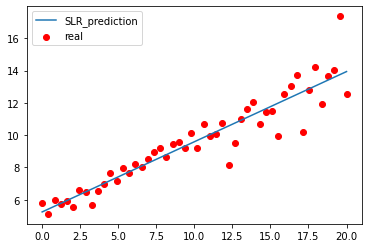

In [44]:
LR_a_prediction = LR_a.fittedvalues
plt.scatter(x,y,c='r',label='real')
plt.plot(x,LR_a_prediction,label='SLR_prediction')
# plt.legend((real[0],pred[0]),('real','prediction'))
plt.legend()
plt.show()

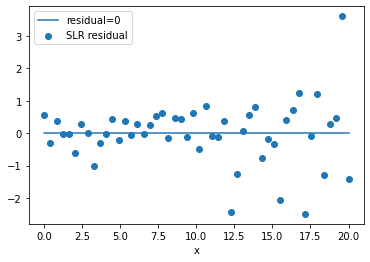

In [46]:
plt.scatter(x,LR_a.resid,label = 'SLR residual')
plt.plot(x,np.array([0]*len(x)),label = 'residual=0')
plt.xlabel('x')
plt.legend()
plt.show()

In [31]:
weights = 1/df_WLS['weights'].values**2
WLR_b = sm.WLS(y,X,weights=weights).fit()
WLR_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.927
Model:                            WLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     613.2
Date:                Sun, 01 Nov 2020   Prob (F-statistic):           5.44e-29
Time:                        09:50:18   Log-Likelihood:                -51.136
No. Observations:                  50   AIC:                             106.3
Df Residuals:                      48   BIC:                             110.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2469      0.143     36.790      0.000       4.960       5.534
x1             0.4466      0.018     24.764      0.000       0.410       0.483
==============================================================================
Omnibus:                        0.407   Durbin-Watson:                   2.317
Prob(Omnibus):                  0.816   Jarque-Bera (JB):                0.103
Skew:                          -0.104   Prob(JB):                        0.950
Kurtosis:                       3.075   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

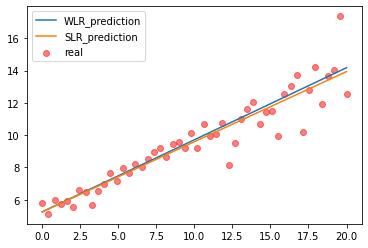

In [32]:
WLR_b_prediction = WLR_b.fittedvalues
plt.scatter(x,y,c='r',alpha=0.5,label='real')
plt.plot(x,WLR_b_prediction,label='WLR_prediction')
plt.plot(x,LR_a_prediction,label='SLR_prediction')
# plt.legend((real[0],pred[0]),('real','prediction'))
plt.legend()
plt.show()

In [34]:
np.std(WLR_b.resid[30:])

1.3988151093465415

In [37]:
np.std(WLR_b.resid[:30])

0.39889072688274524

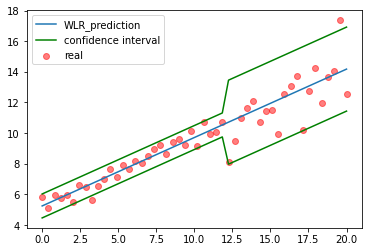

In [45]:
plt.scatter(x,y,c='r',alpha=0.5,label='real')
plt.plot(x,WLR_b_prediction,label='WLR_prediction')
y_up = WLR_b_prediction.copy()
y_up[:30]+=1.96*np.std(WLR_b.resid[:30])
y_up[30:]+=1.96*np.std(WLR_b.resid[30:])
y_down = WLR_b_prediction.copy()
y_down[:30]-=1.96*np.std(WLR_b.resid[:30])
y_down[30:]-=1.96*np.std(WLR_b.resid[30:])
plt.plot(x,y_up,'g')
plt.plot(x,y_down,'g',label = 'confidence interval')
plt.legend()
plt.show()